In [ ]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
 
import math
import pandas as pd
import numpy as npp

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation
 
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
 
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
for i in ['gutenberg','punkt','vader_lexicon']:              
  nltk.download(str(i))
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vader
print('Libraries Imported')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Libraries Imported


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
stock_price=pd.read_csv('/content/NEWS_YAHOO_stock_prediction (1).csv')
stock_price

,Unnamed: 0,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
0,0,AAPL,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
1,1,AAPL,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2,2,AAPL,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
3,3,AAPL,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
4,4,AAPL,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15970,15970,AAPL,2012-07-31,opinion,What s Driving China s Real Estate Rally Par...,In the preceding posts I examined the first t...,21.543928,21.846430,21.525715,21.812857,18.624512,462327600,1
15971,15971,AAPL,2012-07-31,opinion,50 Stocks With The Best Dividend Growth In Jul...,Here is a current sheet of companies with fast...,21.543928,21.846430,21.525715,21.812857,18.624512,462327600,1
15972,15972,AAPL,2012-07-23,opinion,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1
15973,15973,AAPL,2012-07-23,opinion,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1


In [ ]:
# dropping duplicates
stock_price = stock_price.drop_duplicates()

# coverting the datatype of column 'Date' from type object to type 'datetime'
stock_price['Date'] = pd.to_datetime(stock_price['Date']).dt.normalize()

# filtering the important columns required
stock_price = stock_price.filter([ 'Date',  'Open',
       'High', 'Low', 'Close', 'Volume'])

# setting column 'Date' as the index column
stock_price.set_index('Date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

,Open,High,Low,Close,Volume
Date,,,,,
2012-07-23,21.228571,21.639286,20.989643,21.565357,487975600
2012-07-23,21.228571,21.639286,20.989643,21.565357,487975600
2012-07-23,21.228571,21.639286,20.989643,21.565357,487975600
2012-07-24,21.692142,21.774286,21.375357,21.461430,565132400
2012-07-27,20.536072,20.922501,20.413929,20.898571,403936400
...,...,...,...,...,...
2020-01-27,77.514999,77.942497,76.220001,77.237503,161940000
2020-01-27,77.514999,77.942497,76.220001,77.237503,161940000
2020-01-27,77.514999,77.942497,76.220001,77.237503,161940000


Text(0, 0.5, 'Close Price ($)')

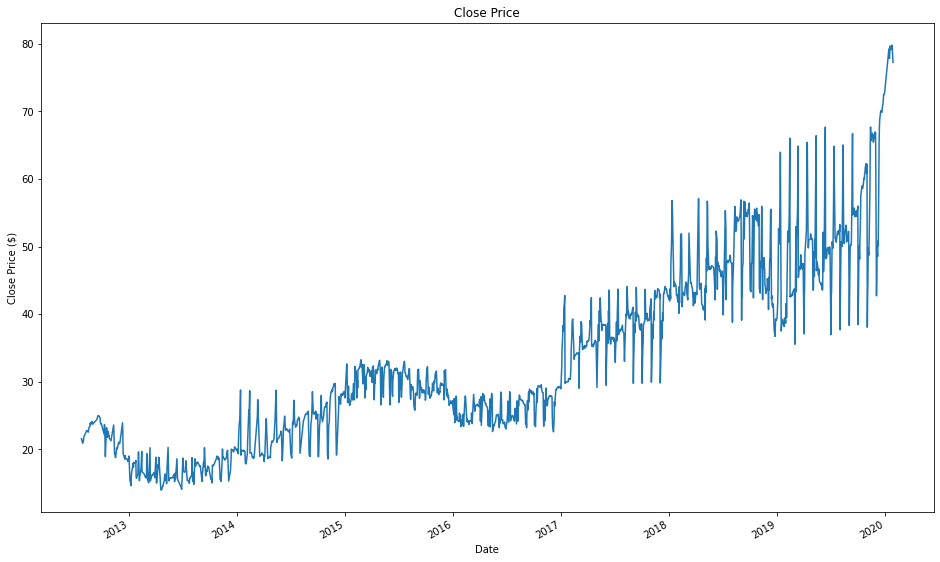

In [ ]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stock_price['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [ ]:
# calculating 7 day rolling mean
stock_price.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-07-23,NaN,NaN,NaN,NaN,NaN
2012-07-23,NaN,NaN,NaN,NaN,NaN
2012-07-23,NaN,NaN,NaN,NaN,NaN
2012-07-24,NaN,NaN,NaN,NaN,NaN
2012-07-27,NaN,NaN,NaN,NaN,NaN
2012-07-30,NaN,NaN,NaN,NaN,NaN
2012-07-31,21.223163,21.552807,21.039643,21.445714,467780800.0
2012-07-31,21.268214,21.582399,21.116225,21.481072,464116800.0
2012-08-10,21.535969,21.794950,21.363163,21.656276,485548000.0


<Axes: xlabel='Date'>

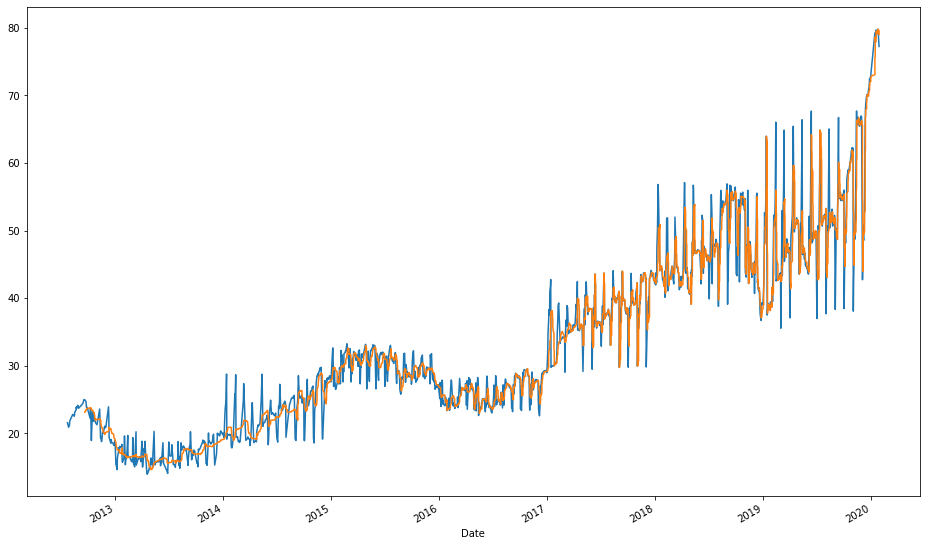

In [ ]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
stock_price['Close'].plot()
stock_price.rolling(window=30).mean()['Close'].plot()

In [ ]:

# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_price)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_price)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 12779
Number of records in Test Data: 3196


In [ ]:
stock_price.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
open_price = stock_price.iloc[start:total_data,0] #open
high = stock_price.iloc[start:total_data,1] #high
low = stock_price.iloc[start:total_data,2] #low
close_price = stock_price.iloc[start:total_data,3] #close
volume = stock_price.iloc[start:total_data,4] #volume


# printing close price
print("Close Price:")
close_price

Close Price:


Date
2012-07-23    21.565357
2012-07-23    21.565357
2012-07-24    21.461430
2012-07-27    20.898571
2012-07-30    21.251072
                ...    
2020-01-27    77.237503
2020-01-27    77.237503
2020-01-27    77.237503
2020-01-27    77.237503
2020-01-27    77.237503
Name: Close, Length: 15974, dtype: float64

In [ ]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 


# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted,  volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,volume,open_price,high,low
Date,,,,,,
2012-07-23,21.565357,21.565357,487975600,21.228571,21.639286,20.989643
2012-07-23,21.565357,21.461430,487975600,21.228571,21.639286,20.989643
2012-07-24,21.461430,20.898571,565132400,21.692142,21.774286,21.375357
2012-07-27,20.898571,21.251072,403936400,20.536072,20.922501,20.413929
2012-07-30,21.251072,21.812857,379142400,21.104286,21.408571,20.993570
2012-07-31,21.812857,21.812857,462327600,21.543928,21.846430,21.525715
2012-07-31,21.812857,22.791786,462327600,21.543928,21.846430,21.525715
2012-08-10,22.791786,22.560356,637994000,23.102858,23.127144,22.718214
2012-08-14,22.560356,22.560356,340169200,22.566786,22.807501,22.507500


In [ ]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2012-07-23    21.565357
2012-07-23    21.461430
2012-07-24    20.898571
2012-07-27    21.251072
2012-07-30    21.812857
                ...    
2020-01-27    77.237503
2020-01-27    77.237503
2020-01-27    77.237503
2020-01-27    77.237503
2020-01-27    77.237503
Name: close_price_shifted, Length: 15973, dtype: float64

In [ ]:

# setting the features dataset for prediction  
cols = ['close_price', 
       'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,volume,open_price,high,low
Date,,,,,
2012-07-23,21.565357,487975600,21.228571,21.639286,20.989643
2012-07-23,21.565357,487975600,21.228571,21.639286,20.989643
2012-07-24,21.461430,565132400,21.692142,21.774286,21.375357
2012-07-27,20.898571,403936400,20.536072,20.922501,20.413929
2012-07-30,21.251072,379142400,21.104286,21.408571,20.993570
...,...,...,...,...,...
2020-01-27,77.237503,161940000,77.514999,77.942497,76.220001
2020-01-27,77.237503,161940000,77.514999,77.942497,76.220001
2020-01-27,77.237503,161940000,77.514999,77.942497,76.220001


In [ ]:
# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = npp.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = npp.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.76866515, -0.374698  , -0.77728749, -0.77861362, -0.77947688],
        [-0.76866515, -0.374698  , -0.77728749, -0.77861362, -0.77947688],
        [-0.77182115, -0.26567361, -0.76328368, -0.77455719, -0.76772205],
        ...,
        [ 0.92195567, -0.83539404,  0.9230437 ,  0.91316245,  0.90369745],
        [ 0.92195567, -0.83539404,  0.9230437 ,  0.91316245,  0.90369745],
        [ 0.92195567, -0.83539404,  0.9230437 ,  0.91316245,  0.90369745]]),
 array([[-0.76866515],
        [-0.77182115],
        [-0.78891374],
        ...,
        [ 0.92195567],
        [ 0.92195567],
        [ 0.92195567]]))

In [ ]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (12779, 5) and y: (12779, 1)
Number of rows and columns in the Test set X: (3193, 5) and y: (3193, 1)


In [ ]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (12779, 5, 1)
Shape of Test set X: (3193, 5, 1)


In [ ]:

# setting the seed to achieve consistent and less random predictions at each execution
npp.random.seed(2016)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 100)            80400     
                                                                 
 dropout_1 (Dropout)         (None, 5, 100)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [ ]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)


Epoch 1/10
1278/1278 [==============================] - 32s 20ms/step - loss: 0.0057 - val_loss: 0.0017
Epoch 2/10
1278/1278 [==============================] - 23s 18ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 3/10
1278/1278 [==============================] - 24s 19ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 4/10
1278/1278 [==============================] - 24s 19ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/10
1278/1278 [==============================] - 24s 19ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 6/10
1278/1278 [==============================] - 24s 19ms/step - loss: 9.5823e-04 - val_loss: 0.0018
Epoch 7/10
1278/1278 [==============================] - 23s 18ms/step - loss: 9.7468e-04 - val_loss: 0.0014
Epoch 8/10
1278/1278 [==============================] - 24s 19ms/step - loss: 9.8713e-04 - val_loss: 0.0029
Epoch 9/10
1278/1278 [==============================] - 24s 19ms/step - loss: 9.2516e-04 - val_loss: 0.0020
Epoch 10/10
1278/1278 [=========================

In [ ]:

# performing predictions
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(npp.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

100/100 [==============================] - 2s 7ms/step
Predictions:


array([[43.824337],
       [36.408573],
       [36.408573],
       [36.408573],
       [36.408573]], dtype=float32)

In [ ]:

# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

3193/3193 [==============================] - 12s 4ms/step - loss: 0.0067
Train Loss = 0.0011
Test Loss = 0.0067


In [ ]:

# calculating root mean squared error
root_mean_square_error = npp.sqrt(npp.mean(npp.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 54.4337


In [ ]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(npp.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 54.4337


In [ ]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(npp.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(npp.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(npp.array(y_test).reshape((len(y_test), 1)))

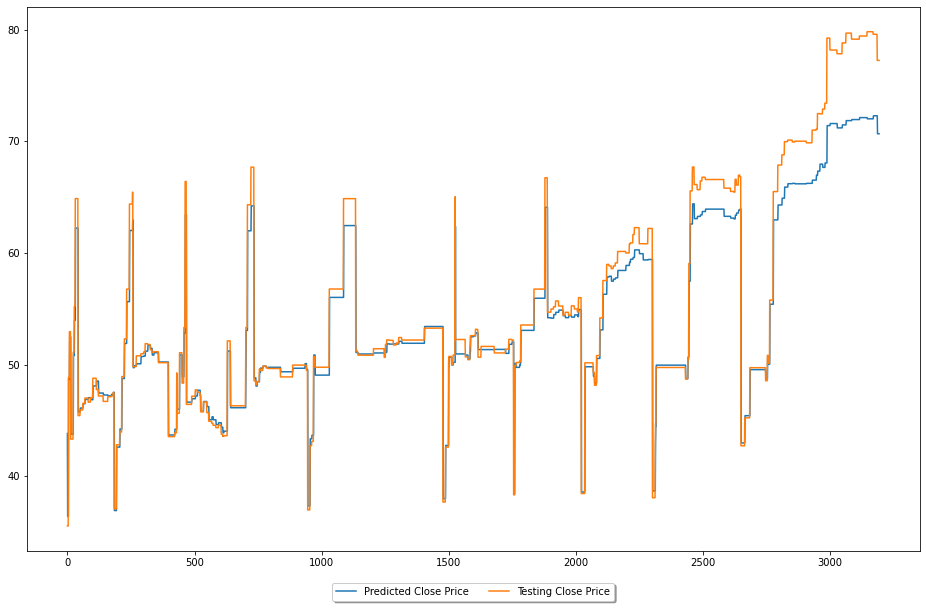

In [ ]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()